In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# loading image
#img0 = cv2.imread('SanFrancisco.jpg',)
# img0 = cv2.imread('Test_image.PNG',)
img0 = cv2.imread('stef.jpeg',)



In [33]:
print('Original Dimensions : ',img0.shape)
 
scale_percent = 200 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
img0 = cv2.resize(img0, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)

Original Dimensions :  (512, 512, 3)
Resized Dimensions :  (532, 532, 3)


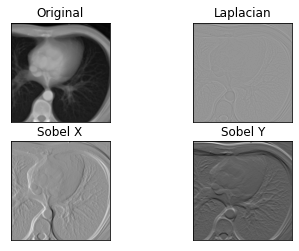

In [34]:
# converting to gray scale
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

# remove noise
img = cv2.GaussianBlur(gray,(3,3),0)

# convolute with proper kernels
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

C:\Users\JUNAID~1\AppData\Local\Temp/ipykernel_28616/533674270.py:16: FutureWarning: Previously, hessian implicitly used 'constant' as the border mode when dealing with the edge of the array. The new behavior is 'reflect'. To recover the old behavior, use mode='constant'. To avoid this warning, please explicitly set the mode.
  ax[2].imshow(hessian(image), cmap=plt.cm.gray)


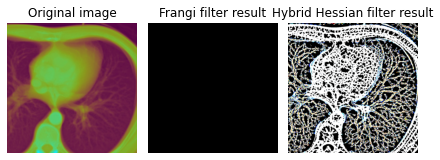

In [35]:
from skimage.data import camera
from skimage.filters import frangi, hessian

import matplotlib.pyplot as plt

image = img0

fig, ax = plt.subplots(ncols=3)

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(frangi(image), cmap=plt.cm.gray)
ax[1].set_title('Frangi filter result')

ax[2].imshow(hessian(image), cmap=plt.cm.gray)
ax[2].set_title('Hybrid Hessian filter result')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

In [36]:
import cv2
img = img0
ddept=1
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
x = cv2.Sobel(gray, ddept, 1,0, ksize=3, scale=1)
y = cv2.Sobel(gray, ddept, 0,1, ksize=3, scale=1)
absx= cv2.convertScaleAbs(x)
absy = cv2.convertScaleAbs(y)
edge = cv2.addWeighted(absx, 0.5, absy, 0.5,0)
cv2.imshow('edge', edge)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.5.5) D:/a/opencv-python/opencv-python/opencv/modules/imgproc/src/filter.simd.hpp:3143: error: (-213:The function/feature is not implemented) Unsupported combination of buffer format (=5), and destination format (=1) in function 'cv::opt_AVX2::getLinearColumnFilter'
